## Homework:
### Burger's equation

In real-world applications, the advection velocity $v$ is usually variable.  For example,

\begin{equation}
\frac{\partial U}{\partial t}+U\frac{\partial U}{\partial x}=0.
\end{equation}

This is called Burger's equation, where the advection velocity depends on the property being advected, i.e., $U$.

1)Let's try the upwind method to solve this equation with an initial Gaussian profile. (U before $\frac{\partial U}{\partial x}$ is velocity at n and j)

2)Please experiment with different grid sizes.

3)Now the solution develops a non-symmetric profile over time.  Can you explain why?

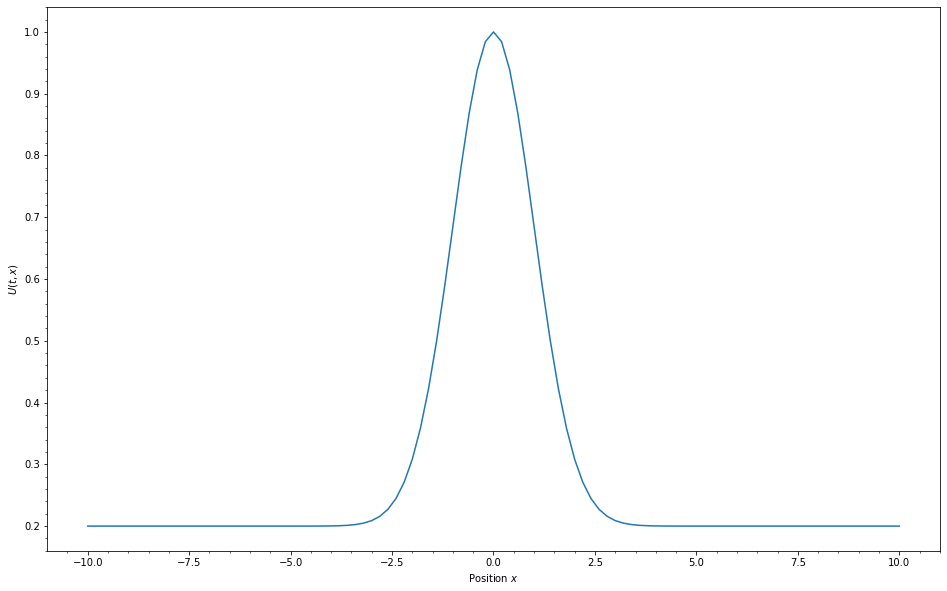

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.9 * dx
U = np.zeros(Nx)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

tp = [t]
Up = np.copy(U)

fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()
plt.plot(x, U)

t =  1.08
t =  2.1599999999999997
t =  3.0600000000000005
t =  4.1400000000000015
t =  5.04
t =  6.119999999999998
t =  7.019999999999997
t =  8.099999999999996
t =  9.179999999999994
t =  10.079999999999993


Text(0.5, 0, '$U(t,x)$')

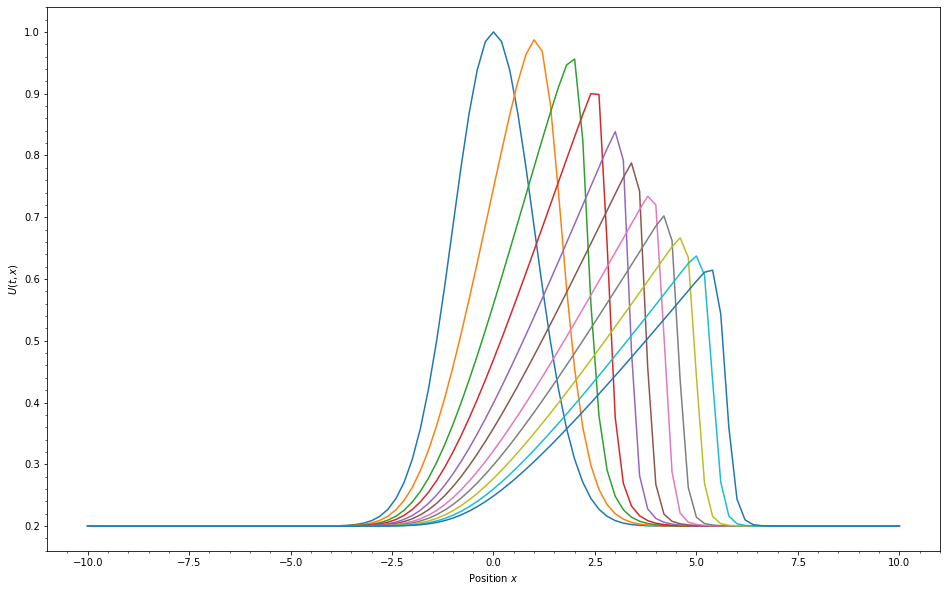

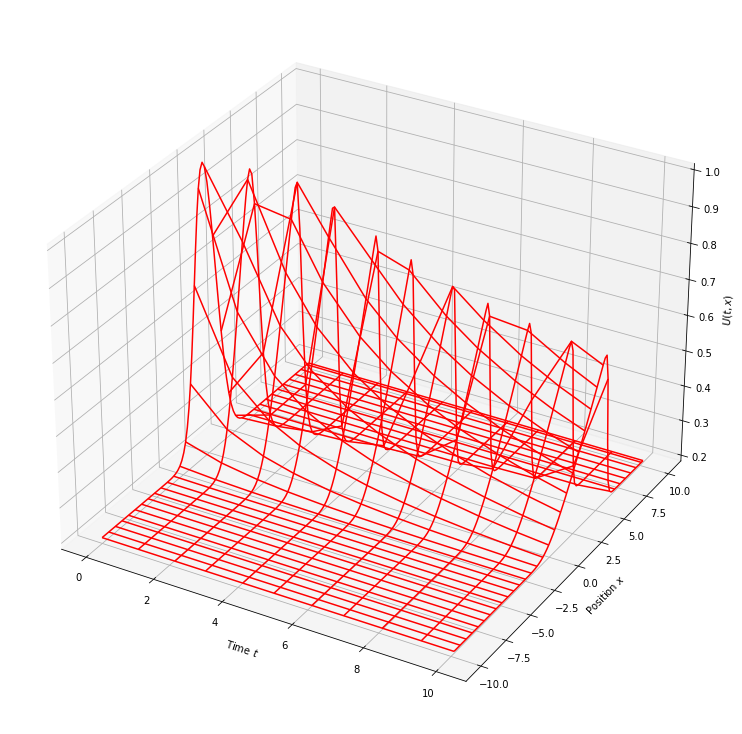

In [99]:
# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.9 * dx                           #Here you can change the grid size.
U = np.zeros(Nx)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

tp = [t]
Up = np.copy(U)

fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()
plt.plot(x, U)

tout = t + dtout


while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)

#    vel=0.2+0.8*x*np.exp(-0.5*x*x)*U    #vel=dU/dt=-U*dU/dx        *I thought this was the velocity but I guess not.
    vel=U

    for ix in range(1, Nx - 1):
        
        if vel[ix] > 0:
           U[ix]=Uold[ix] - (vel[ix]*dt/dx) * (Uold[ix]-Uold[ix-1])  #upwind method
            
        else:
           U[ix]=Uold[ix] - (vel[ix]*dt/dx) * (Uold[ix+1]-Uold[ix])
    
    t += dt
    
    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label="t=%i" %t)
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")


2) If we change dt to anything greater than $dt \approx 1.26$ the solution becomes increasingly unstable.

3) Since height corresponds to velocity, and all heights are positive, the "wind" direction is right-ward. In other words, it is advecting to the right.